In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
# 1. 데이터 다운로드 및 압축해제
import pandas as pd
import numpy as np
import requests
import io
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

압축파일 내 파일 목록: ['AirQualityUCI.csv', 'AirQualityUCI.xlsx']
(9471, 17)

[기초 통계]
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9470.000000  9470.000000  9470.000000  9470.000000    9470.000000   
mean      2.083601  1102.351742   270.550475    10.210792     943.794615   
std       1.461061   218.301114    72.869771     7.522783     268.207922   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.000000   940.000000   275.000000     4.400000     734.000000   
50%       1.700000  1065.000000   275.000000     8.400000     915.000000   
75%       2.700000  1235.000000   275.000000    13.900000    1113.750000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9470.000000   9470.000000  9470.000000   9470.000000  9470.000000   
mean    241.020803    830.609398   110.113939   1449.148258  1027.952270   
std     2

/tmp/ipython-input-6-3997172277.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


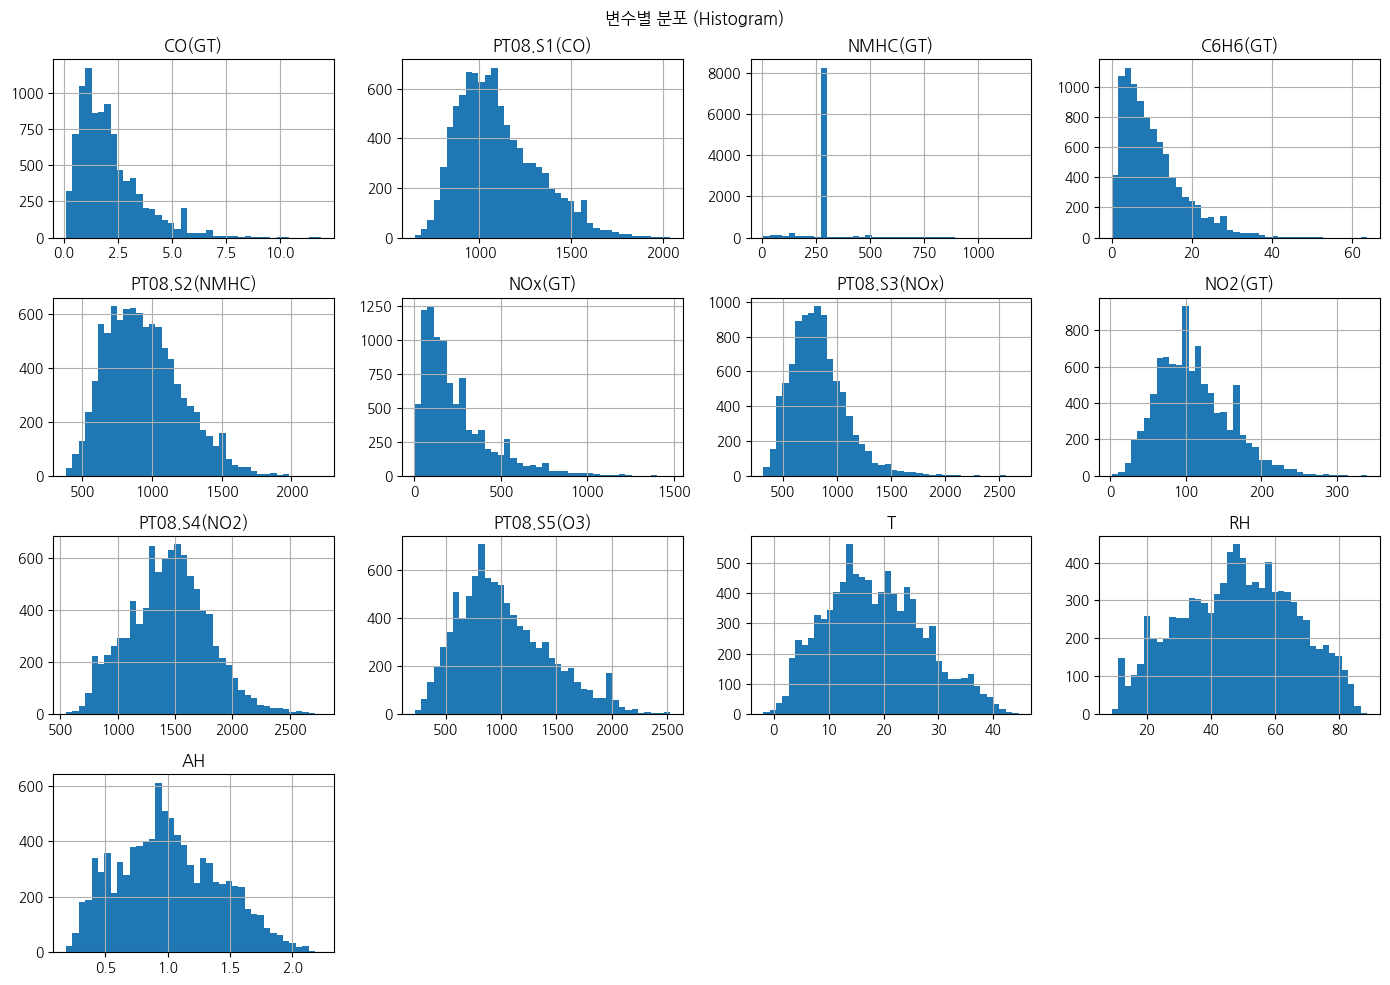

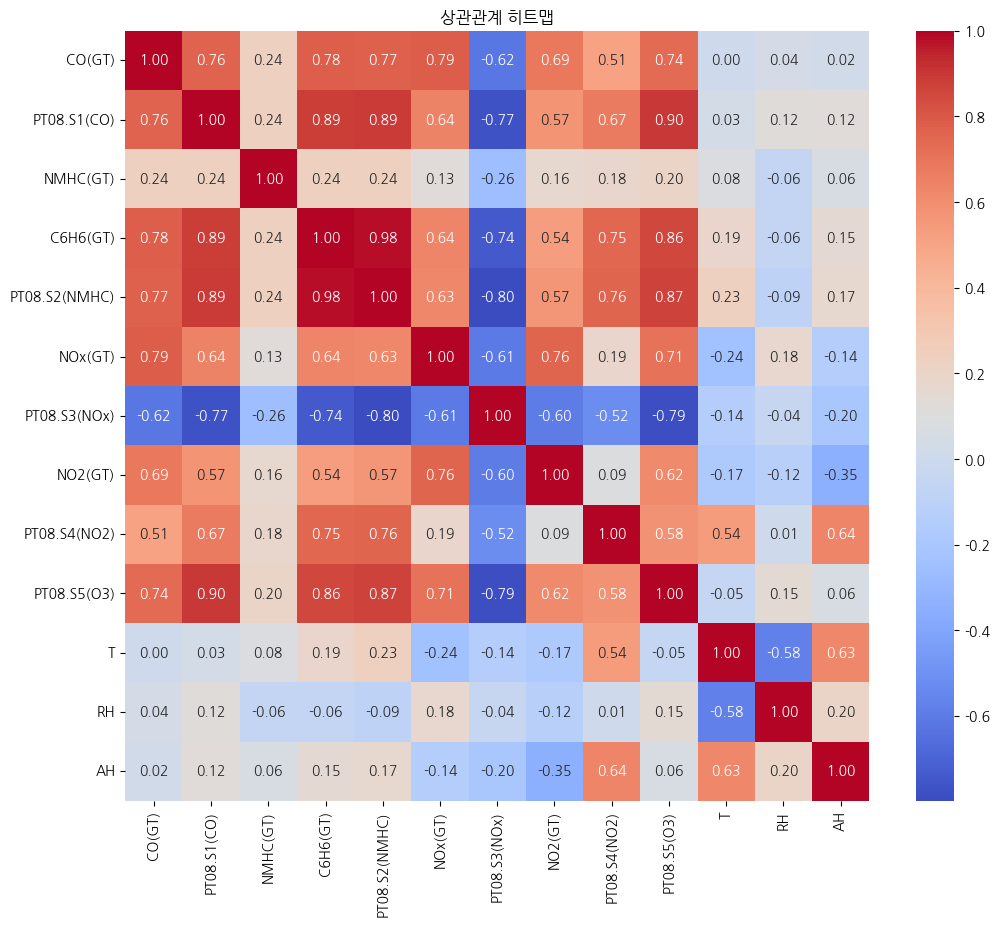

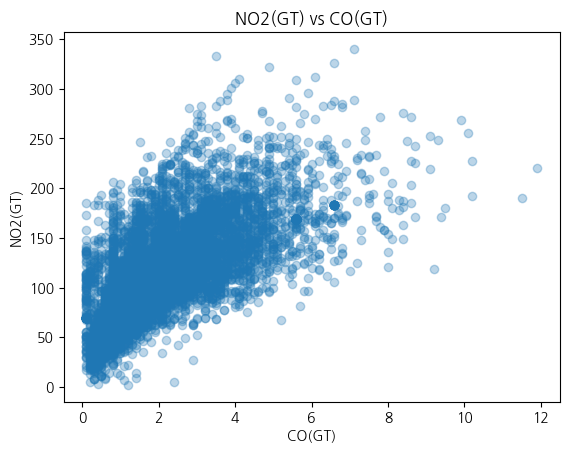

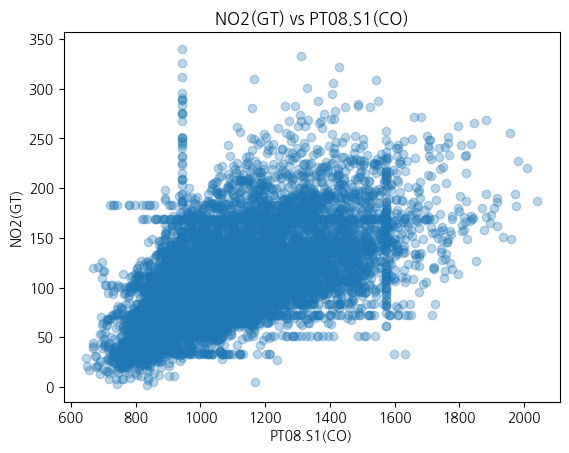

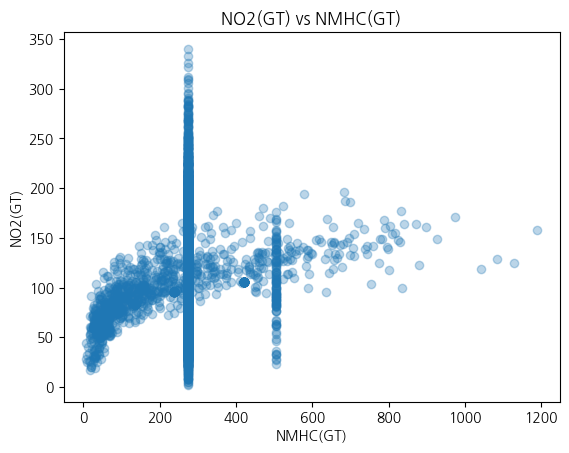

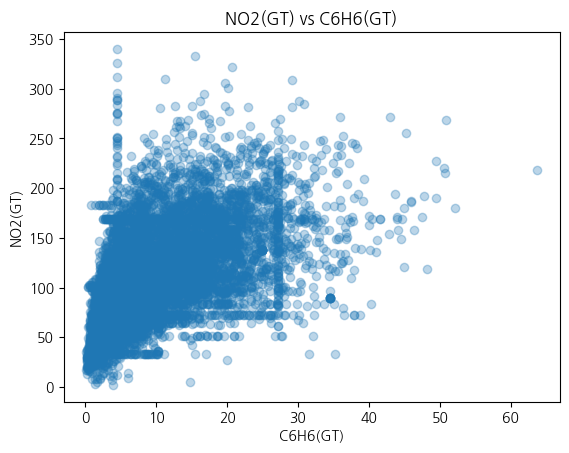

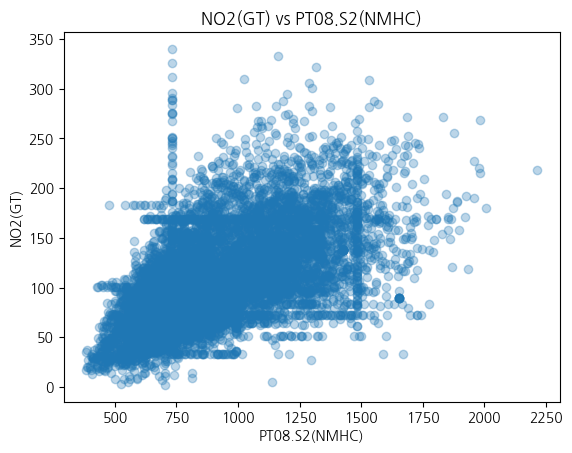

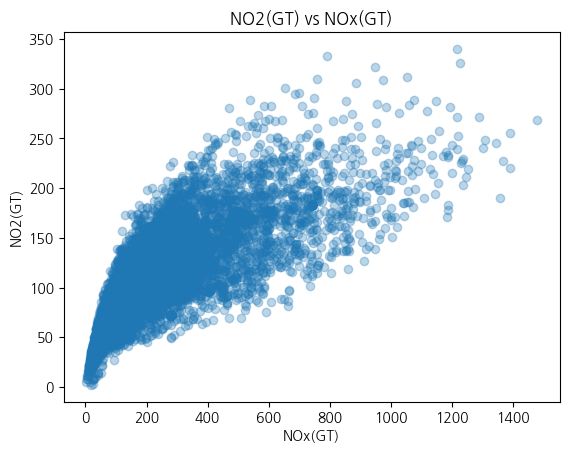

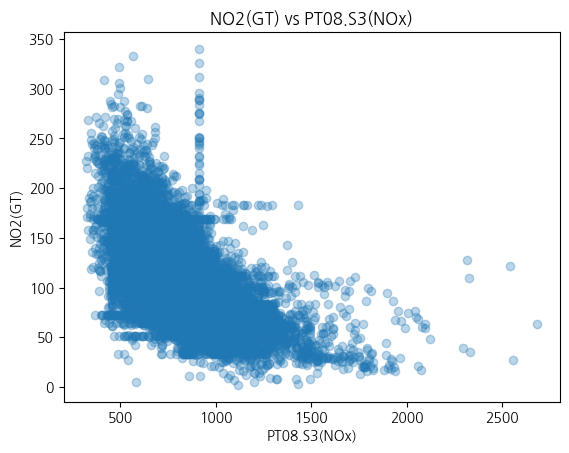

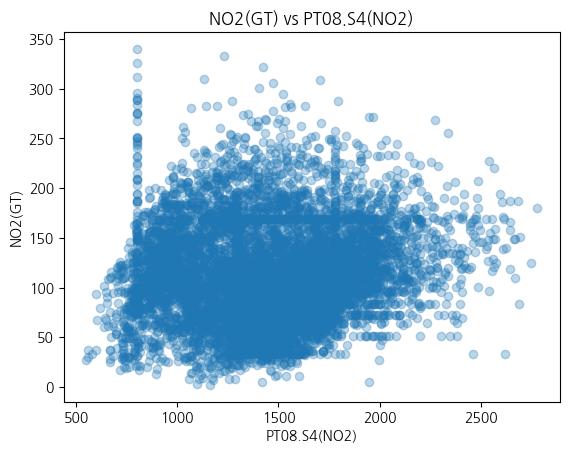

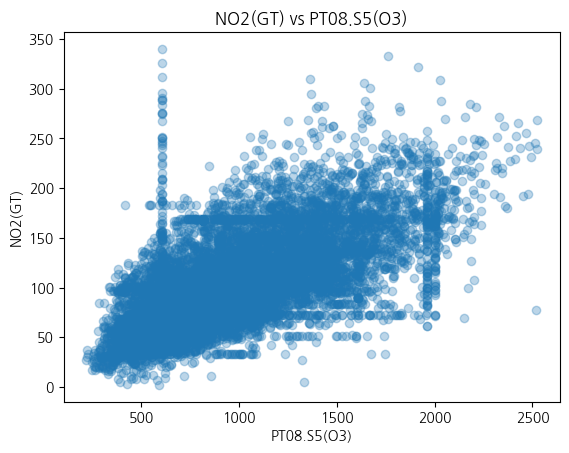

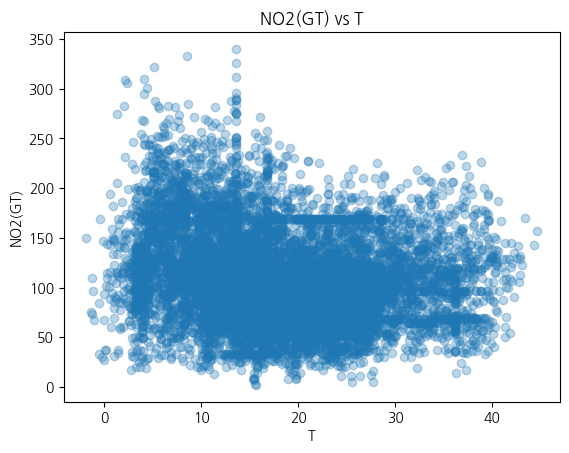

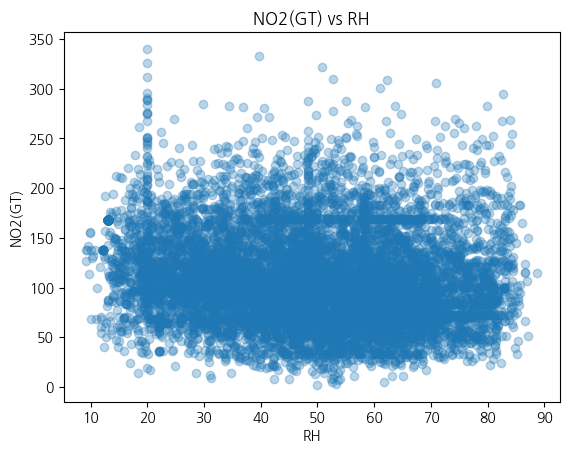

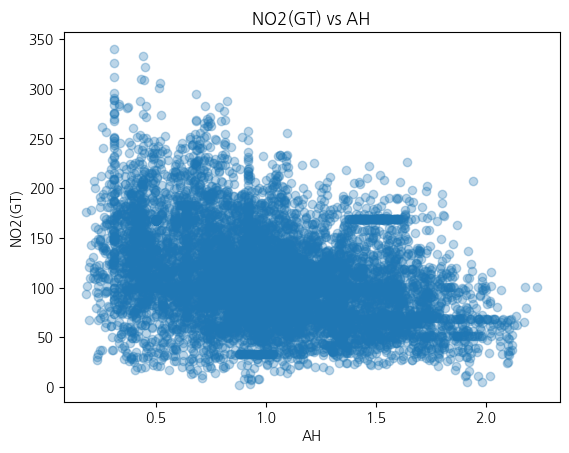


[정규화(표준화) 후 통계]
              CO(GT)   PT08.S1(CO)      NMHC(GT)      C6H6(GT)  PT08.S2(NMHC)  \
count  9.470000e+03  9.470000e+03  9.470000e+03  9.470000e+03   9.470000e+03   
mean  -3.462827e-14  2.040841e-16 -1.320544e-16  1.609863e-14   5.402226e-17   
std    1.000053e+00  1.000053e+00  1.000053e+00  1.000053e+00   1.000053e+00   
min   -1.357716e+00 -2.085998e+00 -3.616924e+00 -1.344094e+00  -2.091005e+00   
25%   -7.416926e-01 -7.437448e-01  6.106455e-02 -7.724666e-01  -7.822502e-01   
50%   -2.625634e-01 -1.711110e-01  6.106455e-02 -2.407204e-01  -1.073650e-01   
75%    4.219069e-01  6.076710e-01  6.106455e-02  4.904306e-01   6.337037e-01   
max    6.719034e+00  4.295433e+00  1.260465e+01  7.110671e+00   4.736148e+00   

            NOx(GT)  PT08.S3(NOx)       NO2(GT)  PT08.S4(NO2)   PT08.S5(O3)  \
count  9.470000e+03  9.470000e+03  9.470000e+03  9.470000e+03  9.470000e+03   
mean   1.200495e-17 -1.800742e-17  2.400989e-17 -1.200495e-16  2.431002e-16   
std    1.000053e+00  1.0

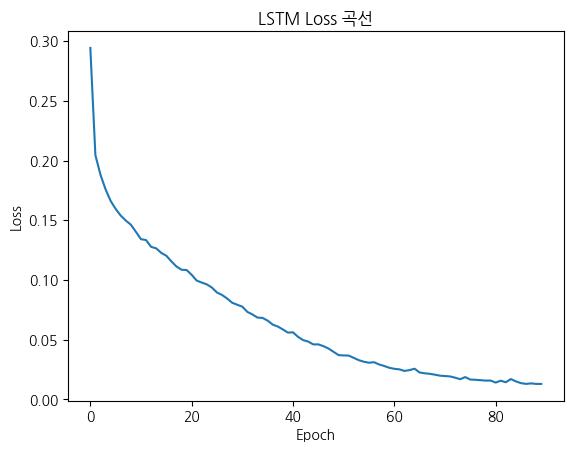

MSE: 0.11005076144300192
MAE: 0.25069668257369354
R2 score: 0.45834093642768703


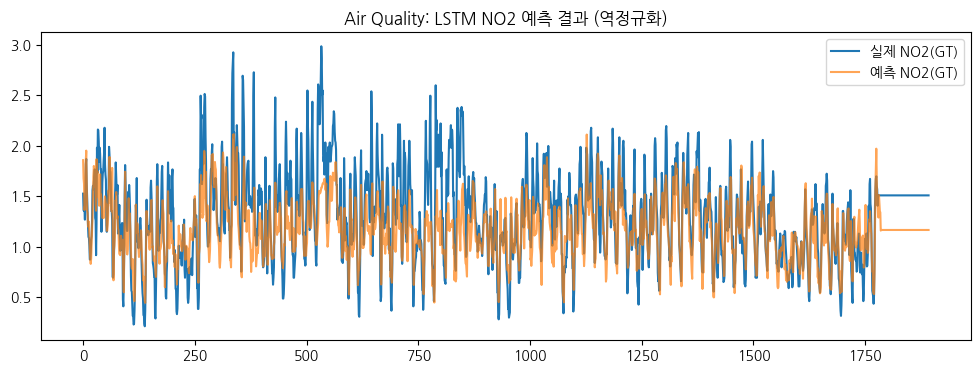

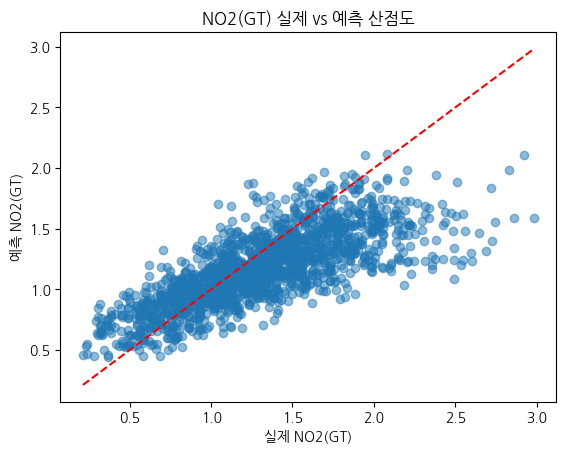

In [6]:


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    print("압축파일 내 파일 목록:", z.namelist())
    with z.open('AirQualityUCI.csv') as f:
        df = pd.read_csv(f, sep=';', decimal=',')

print(df.shape)
df = df.iloc[:-1, :]

cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
        'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
        'PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[cols].replace(-200, np.nan).astype(float)
df = df.fillna(method='ffill')

# ----------- EDA -----------------
print("\n[기초 통계]")
print(df.describe())

# 결측치 개수
print("\n[결측치 개수]")
print(df.isnull().sum())

# 변수별 분포(히스토그램)
df.hist(figsize=(14,10), bins=40)
plt.suptitle("변수별 분포 (Histogram)")
plt.tight_layout()
plt.show()

# 상관관계 분석 및 히트맵
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("상관관계 히트맵")
plt.show()

# NO2(GT)와 다른 변수 간 산점도
for col in cols:
    if col != 'NO2(GT)':
        plt.scatter(df[col], df['NO2(GT)'], alpha=0.3)
        plt.xlabel(col)
        plt.ylabel('NO2(GT)')
        plt.title(f"NO2(GT) vs {col}")
        plt.show()

# ----------- 정규화, 평준화 -----------------
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df_std = pd.DataFrame(scaler_std.fit_transform(df), columns=cols)
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=cols)

print("\n[정규화(표준화) 후 통계]\n", df_std.describe())
print("\n[평준화(MinMax) 후 통계]\n", df_minmax.describe())

# ----------- LSTM 데이터셋 생성 (표준화 데이터 활용) -----------
n_steps = 7
features = df_std.drop('NO2(GT)', axis=1).values
target = df_std['NO2(GT)'].values

X, y = [], []
for i in range(len(df_std)-n_steps):
    X.append(features[i:i+n_steps])
    y.append(target[i+n_steps])
X = np.array(X)
y = np.array(y)

# 시간 순서 유지 train/test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

import torch
from torch.utils.data import Dataset, DataLoader

class AirQualitySeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1,1)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = AirQualitySeqDataset(X_train, y_train)
test_ds = AirQualitySeqDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

# ----------- LSTM 모델 정의 -----------
import torch.nn as nn

class AirLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:,-1,:]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = AirLSTM(input_size=X.shape[2])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# ----------- 학습 -----------
epochs = 90
losses = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss/len(train_loader))
    if (epoch+1)%5==0 or epoch==0:
        print(f"Epoch {epoch+1}: Loss={losses[-1]:.4f}")

plt.plot(losses)
plt.title("LSTM Loss 곡선")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# ----------- 테스트 예측/평가/시각화 -----------
model.eval()
with torch.no_grad():
    y_pred = []
    for xb, yb in test_loader:
        yp = model(xb)
        y_pred.extend(yp.cpu().numpy())
    y_pred = np.array(y_pred).flatten()

# 역정규화 (StandardScaler)
no2_scaler = scaler_std
y_test_real = no2_scaler.inverse_transform(
    np.hstack([np.zeros((len(y_test), len(cols)-1)), y_test.reshape(-1,1)])
)[:,-1]
y_pred_real = no2_scaler.inverse_transform(
    np.hstack([np.zeros((len(y_pred), len(cols)-1)), y_pred.reshape(-1,1)])
)[:,-1]

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test_real, y_pred_real))
print("MAE:", mean_absolute_error(y_test_real, y_pred_real))
print("R2 score:", r2_score(y_test_real, y_pred_real))

plt.figure(figsize=(12,4))
plt.plot(y_test_real, label="실제 NO2(GT)")
plt.plot(y_pred_real, label="예측 NO2(GT)", alpha=0.7)
plt.legend()
plt.title("Air Quality: LSTM NO2 예측 결과 (역정규화)")
plt.show()

plt.scatter(y_test_real, y_pred_real, alpha=0.5)
plt.xlabel("실제 NO2(GT)")
plt.ylabel("예측 NO2(GT)")
plt.title("NO2(GT) 실제 vs 예측 산점도")
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--')
plt.show()
